## AML_2019 Coursework, Part 1, Group 13

<b>1. Why is gradient descent important in machine learning?</b>

Gradient descent is important in machine learning because it is used to minimize the cost function efficiently. In machine learning, there is usually a loss function (called loss function, which we will call the objective function objection function). We usually want this function to be as small as possible (that is, to find the minimum value). Each time a model is created (for example drawing best-fit a line across all that captures most of data points), we have to validate its performance. This is done by coming up with a cost function such as mean square error (the difference between the predicted values and the actual values). In order to fit the best model, we need to minimize that cost function. Intuitively this results in the model which predicts with the smallest error. 

<b> 2. How does vanilla gradient descent work:</b>

Vanilla gradient descent works by stepping iteratively in the direction of the negative gradient of the cost function until a local minimum is found. This is when the slope reaches as close to zero as possible – usually defined by a tolerance variable such as 0.00001.
“Stepping iteratively” means continuously updating the parameters of the cost function by adding the step size multiplied by the negative gradient to each parameter and recalculating the new gradient. The size of each step is called the learning rate. 
The main challenges of vanilla gradient descent includes: 
1.	Taking too large steps may miss the minimum
2.	Taking too small steps results in the algorithm taking too much time and computational effort
3.	It can get stuck at saddle points


<b>3. Two modifications to plain vanilla gradient descent</b>

•	Momentum gradient descent takes into account the previous step and assigns a weight between the previous step and current gradient for each parameter update in gradient descent. This allows the gradient descent to be much smoother.

•	Nesterov’s accelerated gradient descent builds upon the momentum method, by looking ahead and adjusting the step if the gradient flattens or changes sign at the look ahead point. This prevents the overshooting problem.  


### Experiments with Gradient Descent

For our project part 1, we apply vanilla gradient descent, gradient descent with momentum and gradient descent with Nesterov’s accelerated gradient descent to the function:  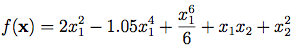


<center>This is a multi-variate function with multiple minima.</center>
<center> Global Minimum of it at (0,0,0)</center>

<center>This function is chosen from http://www.sfu.ca/~ssurjano/camel3.html </center>

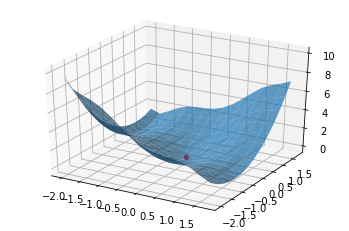
                                                     <center>x1 = np.arange(-2, 2, 0.25)</center>
                                                     <center> x2 = np.arange(-2, 2, 0.25)</center>

Before start to look for global minimum, we define a class called gd, which includes the function of plain vanilla gradient descent, momentum, Nesterov’s Accelerated Gradient. In these functions, they are mainly deal with 2 variables and save pathes for them and the loss function. 

### Plain vanilla gradient descent

<table style="width:100%">
 The code: solver.vanilla_gd(x1_init = 1,x2_init = 1, n_iter = 10000, eta = 0.001, tol = 1e-5)
  <tr>
    <td>steps </td>
    <td>Loss fn</td> 
    <td>x1  </td>
     <td>x2  </td>
      <td>running time</td>
  </tr>
    <tr>
    <td>1662</td>
    <td>0.0004450179573012562</td> 
    <td>7.921638881010898e-07 </td>
     <td>0.0004450179573012562 </td>
        <td>0.014373779296875</td>
  </tr>
<br>Loss fun is nearly equal to 0 when x1 and x2 are close to 0
</table>

#### Change steps (learning rate)

<table style="width:100%">
  <tr>
    <th>eta</th>
    <th>steps</th> 
    <th>running time</th>
  </tr>
  <tr>
    <td>0.001</td>
    <td>1662</td> 
    <td>0.03316926956176758 </td>
  </tr>
  <tr>
    <td>0.005</td>
    <td>330</td> 
    <td>0.009615659713745117</td>
  </tr>
    <tr>
    <td>0.01</td>
    <td>164</td> 
    <td>0.004647970199584961</td>
  </tr>
    <tr>
    <td>0.05</td>
    <td>30</td> 
    <td>0.0011768341064453125</td>
  </tr>
    <tr>
    <td>0.1</td>
    <td>13</td> 
    <td>0.0010347366333007812</td>
  </tr>
    <tr>
    <td>0.5</td>
    <td>Did not converge</td> 
    <td>0.041559696197509766</td>
  </tr>
    
</table>

We can see when increasing learning rate, steps to converge and running time will decrease.
However, if learning rate is too fast, it will diverge

#### Change initial value:

Code: solver.vanilla_gd(x1_init = -2,x2_init = 2, n_iter = 2000, eta = 0.005, tol = 1e-5)
<br>Result: Converged in 69 steps.  Loss fn 1.9103471011713964 achieved by x1 = -1.833583799392227 ,x2 = 2.166416200607775
<br>This shows that x1 and x2 are not the global minimum. We cooclude that global minimum is sensitity to inital value.

### Momentum

<table style="width:100%">
 The code: solver.momentum(x1_init = 1,x2_init = 1, n_iter = 10000, eta = 0.01, tol = 1e-5,<b>alpha =0.5</b>)
  <tr>
    <td>steps </td>
    <td>Loss fn</td> 
    <td>x1  </td>
     <td>x2  </td>
     <td>running time</td>
  </tr>
    <tr>
    <td>73 </td>
    <td>7.044576179967308e-07  </td> 
    <td>0.00041965987733038956 </td>
     <td>0.00041965987733038956  </td>
    <td>0.003508329391479492</td>
  </tr>
</table>

#### Change steps (learning rate)

<table style="width:100%">
  <tr>
    <th>eta</th>
    <th>steps</th> 
    <th>running time</th>
  </tr>
  <tr>
    <td>0.001</td>
    <td>824</td> 
    <td>0.019088268280029297 </td>
  </tr>
  <tr>
    <td>0.005</td>
    <td>157</td> 
    <td>0.006926774978637695 </td>
  </tr>
    <tr>
    <td>0.01</td>
    <td>73</td> 
    <td>0.002539396286010742</td>
  </tr>
    <tr>
    <td>0.05</td>
    <td>20</td> 
    <td>0.0011034011840820312 </td>
  </tr>
    <tr>
    <td>0.1</td>
    <td>20</td> 
    <td>0.0011844635009765625 </td>
  </tr>
    <tr>
    <td>0.8</td>
    <td>Did not converge</td> 
    <td>0.2094135284423828</td>
  </tr>
    
</table>

When increasing learning rate, steps to converge and running time will decrease.
However, if learning rate is too fast, it will diverge

### Nesterov’s Accelerated Gradient

<table style="width:100%">
 solver.nag(x1_init = 1,x2_init = 1, n_iter = 10000, eta = 0.01, tol = 1e-5,<b>alpha =0.5</b>)
  <tr>
    <td>steps </td>
    <td>Loss fn</td> 
    <td>x1  </td>
     <td>x2  </td>
     <td>running time</td>
  </tr>
    <tr>
    <td>3.313415213533334e-06</td>
    <td>156   </td> 
    <td> -0.0007811579107035366 </td>
     <td>0.0018890956092327423 </td>
    <td>0.006716012954711914</td>
  </tr>
</table>

#### change steps (learning rate)

<table style="width:100%">
  <tr>
    <th>eta</th>
    <th>steps</th> 
    <th>running time</th>
  </tr>
  <tr>
    <td>0.001</td>
    <td>1613</td> 
    <td>0.014568328857421875</td>
  </tr>
  <tr>
    <td>0.005</td>
    <td>318</td> 
    <td>0.004069328308105469</td>
  </tr>
    <tr>
    <td>0.01</td>
    <td>156</td> 
    <td>0.002122640609741211</td>
  </tr>
    <tr>
    <td>0.05</td>
    <td>23</td> 
    <td>0.0005309581756591797</td>
  </tr>
    <tr>
    <td>0.1</td>
    <td>13</td> 
    <td>0.00027108192443847656</td>
  </tr>
    
</table>

With increasing eta, time and steps needed to converge will decrease.

### Comparsion

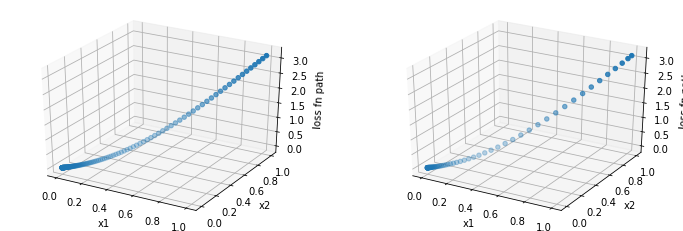

<center> left is plain vanilla and right one is momentum but with alpha=0.5. Converged in 164 steps vs Converged in 73 steps

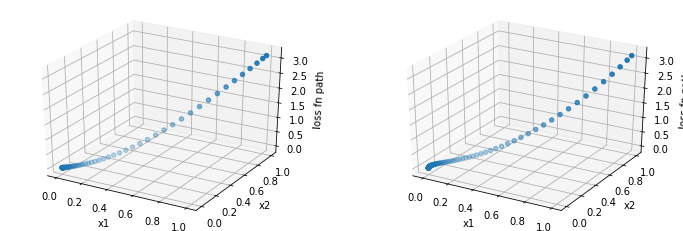

<center> left is momentum and right one is nag. Both of them have same pararmeters. Converged in 73 steps vs Converged in 156 steps

### Conclusion

It is clear that the momentum method is the most efficient among these three methods with the least steps to converge. Besides, if we increase the alpha, momentum method and Nesterov’s Accelerated Gradient will getting faster. When eta is equal to 0.01, Nesterov’s Accelerated Gradient with alpha >0.4 can be faster than plain vanilla gd. So we can tune the parameter to make Nag faster than plain vanilla gd.
Also, if we change initial value, we may achive local minimum.